__Change current directory__

In [1]:
import os
os.chdir('..')

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer
import pandas as pd
import seaborn as sns
from src import detector_descriptor as dd
from src import data as dt
from src import util
from src import experiments as ex
from src import keypoint_processing as kpp
import yaml
from IPython.display import display, display_html, HTML
# plt.style.use('fast')

In [3]:
with open(os.path.join('./', 'config.yml'), 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    cfg = cfg['default']

In [4]:
dataset_path = cfg['path']['dataset']
dataset = cfg['current_dataset']
# labels = dt.load_labels(os.path.join(dataset_path, dataset), '.txt')
pckl_path = cfg['path']['pckl']
# pckl_name = ''.join([dataset, '_label.pckl'])
data_path = os.path.join(pckl_path, ''.join([dataset, '.pckl']))

In [5]:
linestyle_ = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
colors = ['olive', 'green', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'indigo']
markers = ['+', '^', 'o', 's', 'p', '*', 'x', '+', '^', 'o', 's', 'p', '*', 'x']
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"

In [6]:
styles = ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

In [7]:
descriptor_code = {
    'LATCH': 'LT',
    'LUCID': 'LD',
    'AKAZE': 'AZ',
    'BRIEF': 'BF',
    'BRISK': 'BK',
    'ORB': 'OB',
    'FREAK': 'FK',
    'BOOSTDESC': 'BD'
}

detector_code = {
    'HarrisLaplace': 'HL',
    'AKAZE': 'AZ',
    'KAZE': 'KZ',
    'BRISK': 'BK',
    'FAST': 'FT',
    'AGAST': 'AG',
    'ORB': 'OB',
    'StarDetector': 'SD'
}

In [8]:
def display_side_by_side(df, caption, cmap='Blues'):
    output = ""

    output += df.style\
                .background_gradient(cmap=cmap)\
                .set_table_styles(
                   [{
                       'selector': 'th',
                       'props': [
                           ('background-color', 'white'),
                           ('color', 'black'),
                           ('border', '1px solid black')
                       ]
                   },{
                       'selector': 'td',
                       'props': [
                           ('border', '1px solid black')
                       ]
                   },{
                       'selector': 'caption',
                       'props': [
                           ('font-size', '18px'),
                           ('color', 'Black'),
                           ('font-family',r'"Times New Roman", Times, serif'),
                           ('text-align', 'center')
                       ]
                   }])\
                .format('{:.2}')\
                .set_caption(caption)\
                ._repr_html_()
#                     .set_table_attributes("style='display:inline'")\
#     output += "\xa0\xa0\xa0\xa0"
    display(HTML(output))

In [9]:
cmaps = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps2 = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

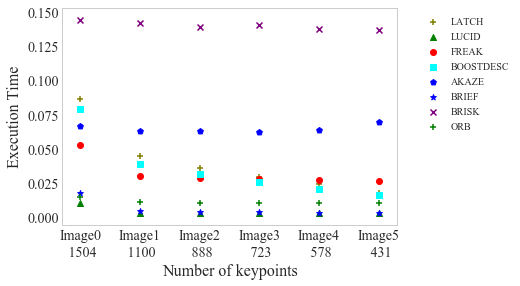

In [10]:
# 'bmh', 
# plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(1,1)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

image_set = util.get_image_set(data_path, 'leuven')

ex.exp_desc_et_plt(image_set, 'AKAZE', ax)
ax.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
ax.set_xlabel("Number of keypoints", fontsize=16)
ax.set_ylabel("Execution Time", fontsize=16)
plt.grid()
plt.show()
# plt.style.use('default')



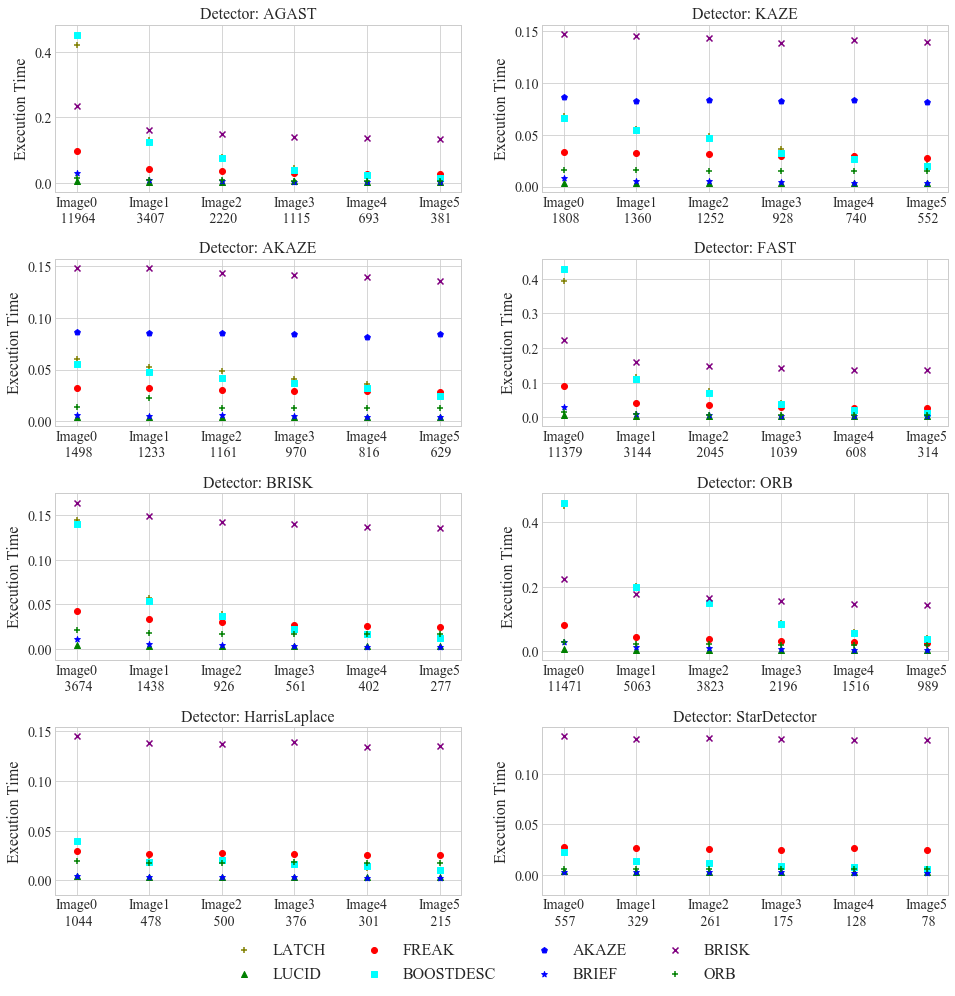

In [11]:
image_sequence_name = 'bikes'
image_set = util.get_image_set(data_path, image_sequence_name)
row = 4
col = 2
fig, axs = plt.subplots(row, col, figsize=(16,16))
legend_i = 0
comb_et = dict()
det_kp_num = dict()
for i in range(len(dd.all_detectors)):
#     print(type(axs[i]))
    detector_name = dd.all_detectors[i]
    if detector_name is 'AKAZE':
        legend_i = i
    comb_et[detector_name], det_kp_num[detector_name] = ex.exp_desc_et_plt(image_set, detector_name, axs[i//col, i%col])
    
#     axs[i//3, i%3].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
#     axs[i//col, i%col].set_xlabel(f'Image number',fontsize=12)
    axs[i//col, i%col].tick_params(axis='x', labelsize=14)
    axs[i//col, i%col].tick_params(axis='y', labelsize=14)
    axs[i//col, i%col].set_ylabel("Execution Time", fontsize=16)
    axs[i//col, i%col].set_title(f'Detector: {detector_name}', fontsize=16)
handles, labels = axs[legend_i//col, legend_i%col].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0.55, -0.20), ncol = 4, fontsize=16)
fig.subplots_adjust(wspace = 0.2, hspace=0.4)
plt.savefig('test.eps', format='eps')
fig.savefig('desc_blur.svg', format='svg', dpi=1200)

plt.show()
# plt.show()


In [12]:
comb_et_avg = dict()
for detector_name in dd.all_detectors:
    comb_et_avg[detector_code[detector_name]] = dict()
    for descriptor_name in dd.all_descriptors:
#         print(detector_name)
        if descriptor_name is 'AKAZE' and detector_name is not 'KAZE' and detector_name is not 'AKAZE':
            comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = None
            continue
        comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = round(sum(comb_et[detector_name][descriptor_name])/6, 3)
    

df1 = pd.DataFrame(comb_et_avg).T
# df_with_cap = dict(zip('Variance: Blur', df))

display_side_by_side(df1, 'Variance: Blur', cmaps[14]+'_r')
# df_with_cap

d:\anaconda3\envs\pt37\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.12,0.005,0.043,0.12,nan,0.01,0.16,0.008
KZ,0.043,0.004,0.031,0.041,0.083,0.005,0.14,0.015
AZ,0.044,0.004,0.03,0.039,0.085,0.005,0.14,0.015
FT,0.11,0.004,0.041,0.11,nan,0.009,0.16,0.008
BK,0.049,0.004,0.031,0.047,nan,0.005,0.14,0.018
OB,0.17,0.005,0.042,0.16,nan,0.012,0.17,0.022
HL,0.019,0.003,0.027,0.02,nan,0.003,0.14,0.018
SD,0.011,0.003,0.026,0.011,nan,0.002,0.14,0.006


In [13]:
det_kp_avg = dict()
for detector_name, values in det_kp_num.items():
    det_kp_avg[detector_name] = int(sum(det_kp_num[detector_name])/6)
# df = pd.DataFrame(det_kp_avg)
det_kp_avg

{'AGAST': 3296,
 'KAZE': 1106,
 'AKAZE': 1051,
 'FAST': 3088,
 'BRISK': 1213,
 'ORB': 4176,
 'HarrisLaplace': 485,
 'StarDetector': 254}

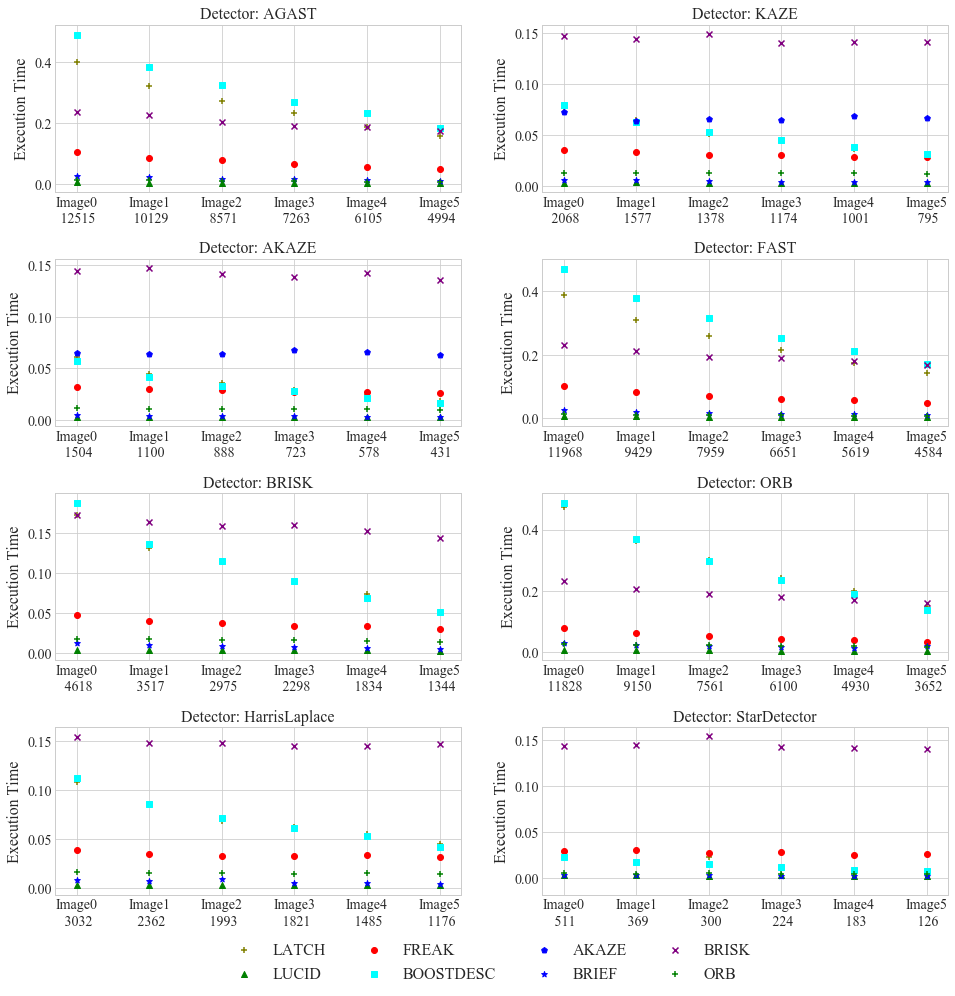

In [14]:
image_sequence_name = 'leuven'
image_set = util.get_image_set(data_path, image_sequence_name)
row = 4
col = 2
fig, axs = plt.subplots(row, col, figsize=(16,16))
legend_i = 0
comb_et = dict()
det_kp_num = dict()
for i in range(len(dd.all_detectors)):
#     print(type(axs[i]))
    detector_name = dd.all_detectors[i]
    if detector_name is 'AKAZE':
        legend_i = i
    comb_et[detector_name], det_kp_num[detector_name] = ex.exp_desc_et_plt(image_set, detector_name, axs[i//col, i%col])
    
#     axs[i//3, i%3].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
#     axs[i//col, i%col].set_xlabel(f'Image number',fontsize=12)
    axs[i//col, i%col].tick_params(axis='x', labelsize=14)
    axs[i//col, i%col].tick_params(axis='y', labelsize=14)
    axs[i//col, i%col].set_ylabel("Execution Time", fontsize=16)
    axs[i//col, i%col].set_title(f'Detector: {detector_name}', fontsize=16)
handles, labels = axs[legend_i//col, legend_i%col].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0.55, -0.20), ncol = 4, fontsize=16)
fig.subplots_adjust(wspace = 0.2, hspace=0.4)
plt.savefig('test.eps', format='eps')
fig.savefig('desc_blur.svg', format='svg', dpi=1200)

plt.show()

In [15]:
comb_et_avg = dict()
for detector_name in dd.all_detectors:
    comb_et_avg[detector_code[detector_name]] = dict()
    for descriptor_name in dd.all_descriptors:
#         print(detector_name)
        if descriptor_name is 'AKAZE' and detector_name is not 'KAZE' and detector_name is not 'AKAZE':
            comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = None
            continue
        comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = round(sum(comb_et[detector_name][descriptor_name])/6, 3)
    

df2 = pd.DataFrame(comb_et_avg).T
# df_with_cap = dict(zip('Variance: Blur', df))

display_side_by_side(df2, 'Variance: Illumination', cmaps[14]+'_r')
# df_with_cap

,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.26,0.005,0.074,0.31,nan,0.019,0.2,0.011
KZ,0.051,0.003,0.031,0.052,0.067,0.005,0.14,0.013
AZ,0.036,0.003,0.029,0.033,0.065,0.004,0.14,0.011
FT,0.25,0.005,0.07,0.3,nan,0.017,0.2,0.011
BK,0.1,0.004,0.037,0.11,nan,0.008,0.16,0.016
OB,0.29,0.005,0.052,0.28,nan,0.021,0.19,0.022
HL,0.071,0.003,0.034,0.071,nan,0.007,0.15,0.016
SD,0.015,0.003,0.027,0.014,nan,0.003,0.14,0.005


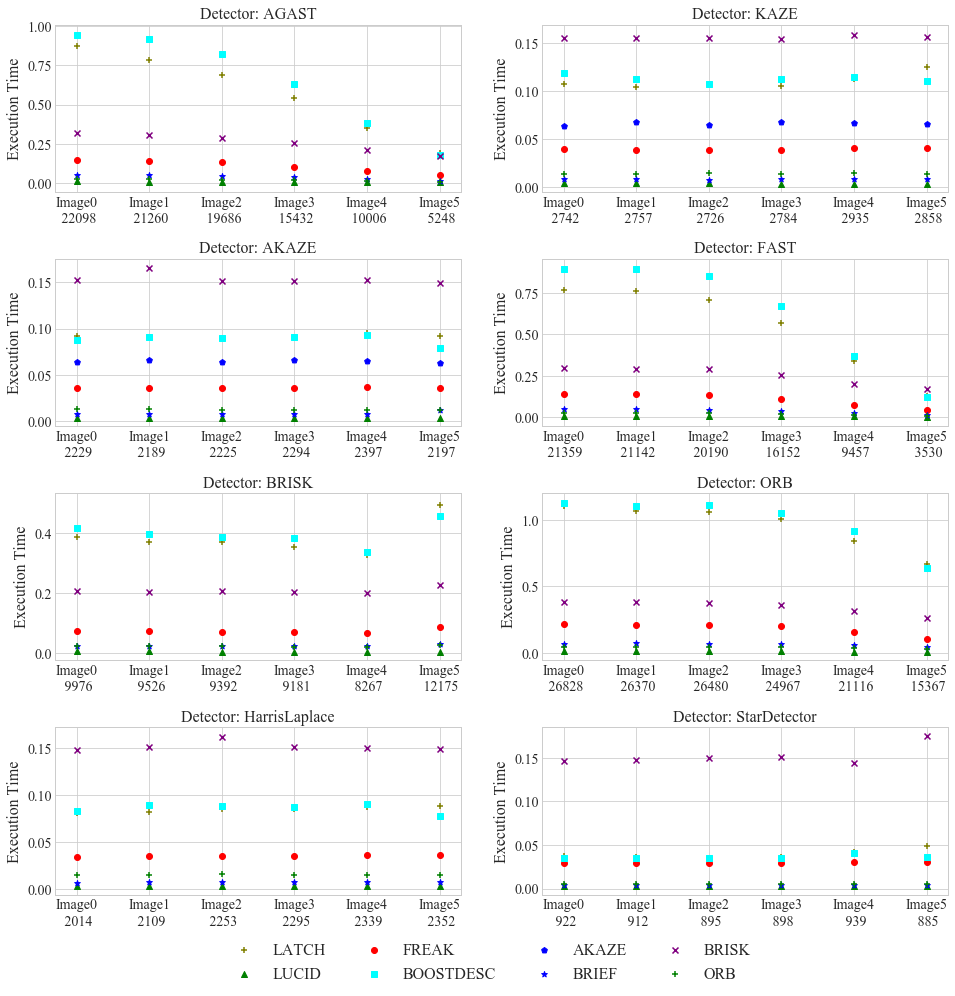

In [16]:
image_sequence_name = 'ubc'
image_set = util.get_image_set(data_path, image_sequence_name)
row = 4
col = 2
fig, axs = plt.subplots(row, col, figsize=(16,16))
legend_i = 0
comb_et = dict()
det_kp_num = dict()
for i in range(len(dd.all_detectors)):
#     print(type(axs[i]))
    detector_name = dd.all_detectors[i]
    if detector_name is 'AKAZE':
        legend_i = i
    comb_et[detector_name], det_kp_num[detector_name] = ex.exp_desc_et_plt(image_set, detector_name, axs[i//col, i%col])
    
#     axs[i//3, i%3].legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
#     axs[i//col, i%col].set_xlabel(f'Image number',fontsize=12)
    axs[i//col, i%col].tick_params(axis='x', labelsize=14)
    axs[i//col, i%col].tick_params(axis='y', labelsize=14)
    axs[i//col, i%col].set_ylabel("Execution Time", fontsize=16)
    axs[i//col, i%col].set_title(f'Detector: {detector_name}', fontsize=16)
handles, labels = axs[legend_i//col, legend_i%col].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0.55, -0.20), ncol = 4, fontsize=16)
fig.subplots_adjust(wspace = 0.2, hspace=0.4)
# plt.savefig('test.eps', format='eps')
fig.savefig('desc_blur.svg', format='svg', dpi=1200)

plt.show()
# plt.show()


In [17]:
comb_et_avg = dict()
for detector_name in dd.all_detectors:
    comb_et_avg[detector_code[detector_name]] = dict()
    for descriptor_name in dd.all_descriptors:
#         print(detector_name)
        if descriptor_name is 'AKAZE' and detector_name is not 'KAZE' and detector_name is not 'AKAZE':
            comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = None
            continue
        comb_et_avg[detector_code[detector_name]][descriptor_code[descriptor_name]] = round(sum(comb_et[detector_name][descriptor_name])/6, 3)
    

df3 = pd.DataFrame(comb_et_avg).T
# df_with_cap = dict(zip('Variance: Blur', df))

display_side_by_side(df3, 'Variance: Illumination', cmaps[14]+'_r')
# df_with_cap

,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.57,0.007,0.11,0.65,nan,0.036,0.26,0.018
KZ,0.11,0.003,0.039,0.11,0.065,0.008,0.15,0.014
AZ,0.091,0.003,0.036,0.088,0.064,0.008,0.15,0.012
FT,0.54,0.007,0.11,0.63,nan,0.036,0.25,0.018
BK,0.38,0.005,0.074,0.4,nan,0.025,0.21,0.022
OB,0.96,0.01,0.18,0.99,nan,0.061,0.34,0.039
HL,0.085,0.003,0.035,0.086,nan,0.007,0.15,0.015
SD,0.039,0.003,0.03,0.036,nan,0.004,0.15,0.005


In [25]:
cmap_num = 7

display_side_by_side(df1, 'Variance: Blur', cmaps[cmap_num]+'_r')
display_side_by_side(df2, 'Variance: Illumination', cmaps[cmap_num]+'_r')
display_side_by_side(df3, 'Variance: Jpeg-compression', cmaps[cmap_num]+'_r')


,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.12,0.005,0.043,0.12,nan,0.01,0.16,0.008
KZ,0.043,0.004,0.031,0.041,0.083,0.005,0.14,0.015
AZ,0.044,0.004,0.03,0.039,0.085,0.005,0.14,0.015
FT,0.11,0.004,0.041,0.11,nan,0.009,0.16,0.008
BK,0.049,0.004,0.031,0.047,nan,0.005,0.14,0.018
OB,0.17,0.005,0.042,0.16,nan,0.012,0.17,0.022
HL,0.019,0.003,0.027,0.02,nan,0.003,0.14,0.018
SD,0.011,0.003,0.026,0.011,nan,0.002,0.14,0.006


,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.26,0.005,0.074,0.31,nan,0.019,0.2,0.011
KZ,0.051,0.003,0.031,0.052,0.067,0.005,0.14,0.013
AZ,0.036,0.003,0.029,0.033,0.065,0.004,0.14,0.011
FT,0.25,0.005,0.07,0.3,nan,0.017,0.2,0.011
BK,0.1,0.004,0.037,0.11,nan,0.008,0.16,0.016
OB,0.29,0.005,0.052,0.28,nan,0.021,0.19,0.022
HL,0.071,0.003,0.034,0.071,nan,0.007,0.15,0.016
SD,0.015,0.003,0.027,0.014,nan,0.003,0.14,0.005


,LT,LD,FK,BD,AZ,BF,BK,OB
AG,0.57,0.007,0.11,0.65,nan,0.036,0.26,0.018
KZ,0.11,0.003,0.039,0.11,0.065,0.008,0.15,0.014
AZ,0.091,0.003,0.036,0.088,0.064,0.008,0.15,0.012
FT,0.54,0.007,0.11,0.63,nan,0.036,0.25,0.018
BK,0.38,0.005,0.074,0.4,nan,0.025,0.21,0.022
OB,0.96,0.01,0.18,0.99,nan,0.061,0.34,0.039
HL,0.085,0.003,0.035,0.086,nan,0.007,0.15,0.015
SD,0.039,0.003,0.03,0.036,nan,0.004,0.15,0.005


In [19]:
print(dd.all_descriptors)

['LATCH', 'LUCID', 'FREAK', 'BOOSTDESC', 'AKAZE', 'BRIEF', 'BRISK', 'ORB']


#### Default Size of the Descriptors
- LATCH: 32
- LUCID: 27
- FREAK: 64
- BOOSTDESC: 32
- AKAZE: 61
- BRIEF: 32
- BRISK: 64
- ORB: 32



In [20]:
image_sequence_name = 'bikes'
image_set = util.get_image_set(data_path, image_sequence_name)
image = image_set['bikes_img6']
kp = kpp.get_kp(image, 'AKAZE')

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
descriptor_eigenvalues = dict()
for descriptor in dd.all_descriptors:
    _, desc = kpp.get_desc(image, kp, descriptor)
    pca.fit(desc)
#     print(descriptor + ":" + str(desc.shape))
#     descriptor_eigenvalues[descriptor] = dict()
    descriptor_eigenvalues[descriptor] = [np.round(np.sum(pca.singular_values_[:10]/pca.explained_variance_ratio_[:10]), decimals=3), np.round(np.sum(pca.singular_values_/pca.explained_variance_ratio_), decimals=3)]
#     descriptor_eigenvalues[descriptor]['su = 
#     print(descriptor + str(descriptor_eigenvalues[descriptor]))
#     print(np.round(pca.explained_variance_ratio_, decimals=3))
#     print(np.round(pca.singular_values_, decimals=3))

In [22]:
df = pd.DataFrame(data=descriptor_eigenvalues).T
df.columns = ['sum 10', 'sum all']
df.sort_values('sum all', ascending=False)

,sum 10,sum all
LUCID,8661392.977,7.665110e+07
FREAK,1423197.640,2.566553e+07
BRISK,1090561.754,2.226109e+07
AKAZE,766242.811,1.294941e+07
BRIEF,528244.463,3.078848e+06
ORB,487665.411,2.918619e+06
BOOSTDESC,435062.060,2.307926e+06
LATCH,458623.460,2.101647e+06


In [23]:
df.sort_values('sum 10', ascending=False)

,sum 10,sum all
LUCID,8661392.977,7.665110e+07
FREAK,1423197.640,2.566553e+07
BRISK,1090561.754,2.226109e+07
AKAZE,766242.811,1.294941e+07
BRIEF,528244.463,3.078848e+06
ORB,487665.411,2.918619e+06
LATCH,458623.460,2.101647e+06
BOOSTDESC,435062.060,2.307926e+06
